Name : Akshaya Brian Tauro, ID : A20502097, Course Number : CS 584, Semester : Fall 2022

####This file consists of code which has transfer learning model for the respiratory disease detection

Mounted at /content/drive
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  

<ipython-input-1-1c950a25611d>:121: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/15
 2/50 [>.............................] - ETA: 5:02 - loss: 3.7249 - acc: 0.3500

50/50 [==============================] - 21s 329ms/step - loss: 3.7249 - acc: 0.3500 - val_loss: 5.4907 - val_acc: 0.5000


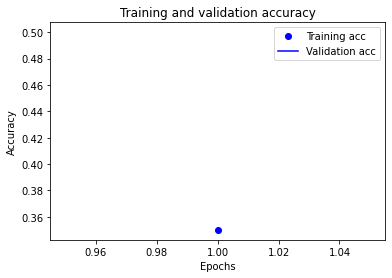

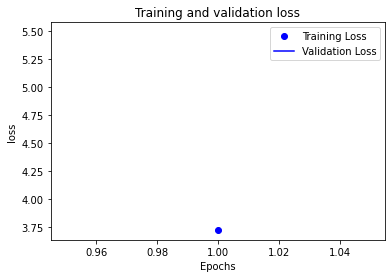

<ipython-input-1-1c950a25611d>:159: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)


test acc:  0.30000001192092896


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

from keras.models import load_model
model = load_model("/content/drive/MyDrive/Colab Notebooks/ML/ML_Project/data/models/RespiratoryDiseaseDetection-MetaData-CNN-grayscale.h5")
model.summary()

import os

# Transfer Learning - Load VGG16
from keras.applications import VGG16
conv_base = VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(150,150,3)
)
conv_base.summary()

# Creating network
from keras import layers
from keras import models
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))
model.summary()     

conv_base.trainable = True
print('Number of weights tensors before freezing the conv base: ' + str(len(model.trainable_weights)))

conv_base.trainable = False
print('Number of weights tensors after freezing the conv base: ' + str(len(model.trainable_weights)))

train_dataset_path = r"/content/drive/MyDrive/Colab Notebooks/ML/ML_Project/data/metaData/train"
test_dataset_path = r"/content/drive/MyDrive/Colab Notebooks/ML/ML_Project/data/metaData/test"
validation_dataset_path = r"/content/drive/MyDrive/Colab Notebooks/ML/ML_Project/data/metaData/validation"

##Covid data
covid_train_path = r"/content/drive/MyDrive/Colab Notebooks/ML/ML_Project/data/metaData/train/COVID19"
covid_train_images = os.listdir(r"/content/drive/MyDrive/Colab Notebooks/ML/ML_Project/data/metaData/train/COVID19")
covid_val_path = r"/content/drive/MyDrive/Colab Notebooks/ML/ML_Project/data/metaData/validation/COVID19"
covid_val_images = os.listdir(r"/content/drive/MyDrive/Colab Notebooks/ML/ML_Project/data/metaData/validation/COVID19")
covid_test_path = r"/content/drive/MyDrive/Colab Notebooks/ML/ML_Project/data/metaData/test/COVID19"
covid_test_images = os.listdir(r"/content/drive/MyDrive/Colab Notebooks/ML/ML_Project/data/metaData/test/COVID19")

#Tuberculosis
tuberculosis_train_path = r"/content/drive/MyDrive/Colab Notebooks/ML/ML_Project/data/metaData/train/TUBERCULOSIS"
tuberculosis_train_images = os.listdir(r"/content/drive/MyDrive/Colab Notebooks/ML/ML_Project/data/metaData/train/TUBERCULOSIS")
tuberculosis_val_path = r"/content/drive/MyDrive/Colab Notebooks/ML/ML_Project/data/metaData/validation/TUBERCULOSIS"
tuberculosis_val_images = os.listdir(r"/content/drive/MyDrive/Colab Notebooks/ML/ML_Project/data/metaData/validation/TUBERCULOSIS")
tuberculosis_test_path = r"/content/drive/MyDrive/Colab Notebooks/ML/ML_Project/data/metaData/test/TUBERCULOSIS"
tuberculosis_test_images = os.listdir(r"/content/drive/MyDrive/Colab Notebooks/ML/ML_Project/data/metaData/test/TUBERCULOSIS")

#Pneumonia
pneumonia_train_path = r"/content/drive/MyDrive/Colab Notebooks/ML/ML_Project/data/metaData/train/PNEUMONIA"
pneumonia_train_images = os.listdir(r"/content/drive/MyDrive/Colab Notebooks/ML/ML_Project/data/metaData/train/PNEUMONIA")
pneumonia_val_path = r"/content/drive/MyDrive/Colab Notebooks/ML/ML_Project/data/metaData/validation/PNEUMONIA"
pneumonia_val_images = os.listdir(r"/content/drive/MyDrive/Colab Notebooks/ML/ML_Project/data/metaData/validation/PNEUMONIA")
pneumonia_test_path = r"/content/drive/MyDrive/Colab Notebooks/ML/ML_Project/data/metaData/test/PNEUMONIA"
pneumonia_test_images = os.listdir(r"/content/drive/MyDrive/Colab Notebooks/ML/ML_Project/data/metaData/test/PNEUMONIA")

#Normal
normal_train_path = r"/content/drive/MyDrive/Colab Notebooks/ML/ML_Project/data/metaData/train/NORMAL"
normal_train_images = os.listdir(r"/content/drive/MyDrive/Colab Notebooks/ML/ML_Project/data/metaData/train/NORMAL")
normal_val_path = r"/content/drive/MyDrive/Colab Notebooks/ML/ML_Project/data/metaData/validation/NORMAL"
normal_val_images = os.listdir(r"/content/drive/MyDrive/Colab Notebooks/ML/ML_Project/data/metaData/validation/NORMAL")
normal_test_path = r"/content/drive/MyDrive/Colab Notebooks/ML/ML_Project/data/metaData/test/NORMAL"
normal_test_images = os.listdir(r"/content/drive/MyDrive/Colab Notebooks/ML/ML_Project/data/metaData/test/NORMAL")

from keras.preprocessing.image import ImageDataGenerator
# Augumented data for better generalization using ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)
# train_datagen  = ImageDataGenerator(rescale=1./255)
validation_datagen  = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

batch_size= 32
train_generator = train_datagen.flow_from_directory(
    train_dataset_path,  #image folder
    target_size = (150, 150), #resize images
    batch_size=batch_size,
    # color_mode='grayscale',
    class_mode='categorical')
validation_generator = validation_datagen.flow_from_directory(
    validation_dataset_path,
    target_size=(150,150),
    batch_size=batch_size,
    # color_mode='grayscale',
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_dataset_path,
    target_size=(150,150),
    batch_size=batch_size,
    # color_mode='grayscale',
    class_mode='categorical')

#Train
#Compile network
from keras import optimizers
model.compile(
    loss='categorical_crossentropy',
    optimizer=optimizers.RMSprop(learning_rate=0.001),
    metrics=['acc'])

#Early stop setup
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_acc', patience=3, restore_best_weights=True)

# original fit model
history = model.fit_generator(
    train_generator,
    verbose=1,
    steps_per_epoch=25,
    epochs=15,
    validation_data=validation_generator,
    validation_steps=25,
    callbacks=early_stop
    )

# Plot Results
import matplotlib.pyplot as plt
acc= history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

# Plot accuracy
plt.plot(epochs, acc,  'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

# Plot loss
plt.figure()
plt.plot(epochs, loss,  'bo', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title('Training and validation loss')
plt.ylabel('loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()


test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc: ', test_acc)
# print('test loss: ', test_loss)

model.save("/content/drive/MyDrive/Colab Notebooks/ML/ML_Project/data/models/RespiratoryDiseaseDetection-MetaData-TransferLearning.h5")